In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-17_151505_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(30.0, 33.0),
 (30.0, 33.0),
 (30.0, 35.0),
 (30.0, 34.0),
 (34.0, 36.0),
 (29.0, 41.0),
 (32.0, 34.0),
 (31.0, 34.0),
 (31.0, 32.0),
 (30.0, 37.0),
 (30.0, 35.0),
 (33.0, 37.0),
 (28.0, 36.0)]

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(4.3364054109507055, 4.7326598381137943),
 (4.2477394641711657, 4.6390249660023253),
 (4.2514913971495485, 4.6290327223871541),
 (4.2964377440873456, 4.6898194169597271),
 (4.3146119336749509, 5.0646199626636292),
 (4.2483251230600265, 5.8396423049935899),
 (4.2888103195569354, 6.1151417201627609),
 (4.180671248132402, 5.1981083452995192),
 (4.1631717194308235, 4.7694910033681337),
 (4.2162163296374926, 4.7570604190317418),
 (4.2156040965948334, 4.7299191244602623),
 (4.1900152296162778, 4.897064138142408),
 (4.2564860666379243, 5.4786716758548151)]

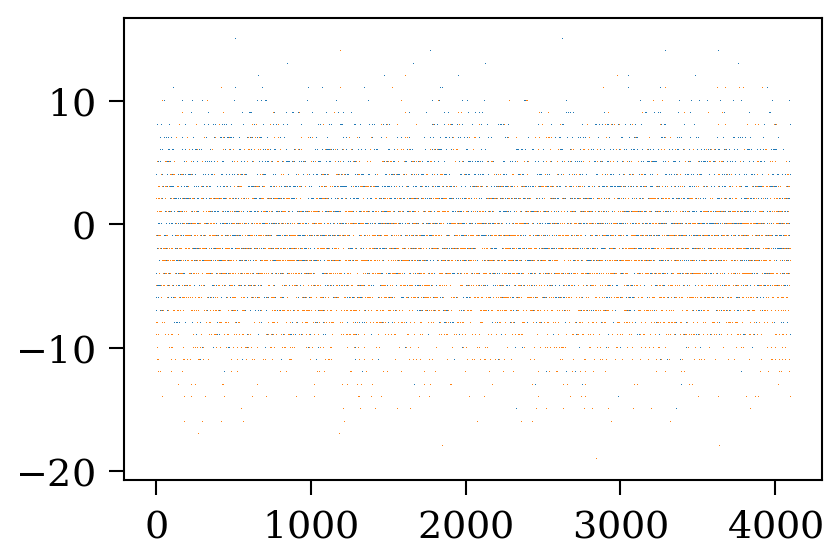

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0

In [10]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

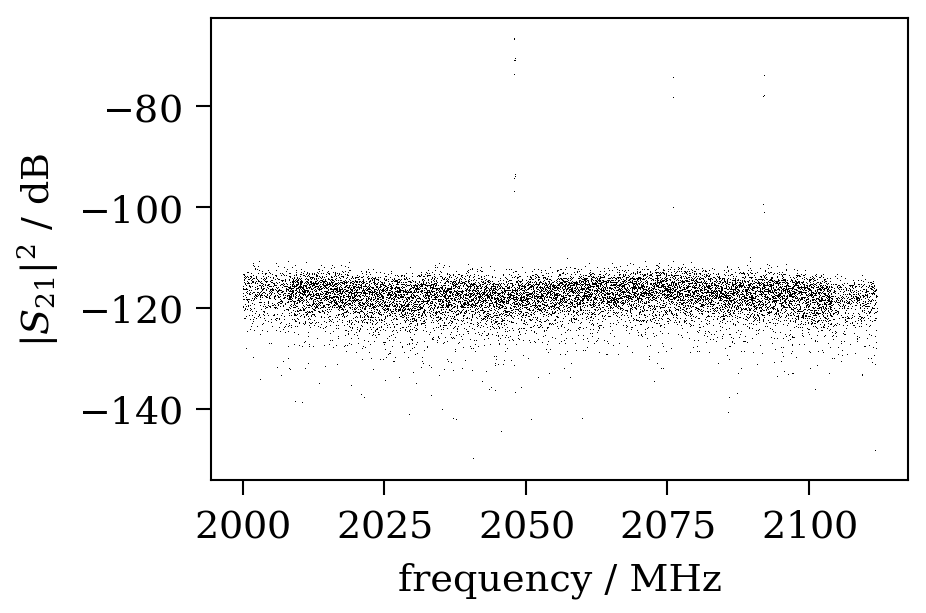

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.legend()
#ax.set_ylim()
#ax.set_xlim()
